## Installing SystemML python package

In [1]:
!pip install  --upgrade systemml

    100% |████████████████████████████████| 10.5MB 114kB/s eta 0:00:01
    100% |████████████████████████████████| 12.1MB 101kB/s eta 0:00:01
    100% |████████████████████████████████| 46.7MB 26kB/s  eta 0:00:01
    100% |████████████████████████████████| 24.3MB 47kB/s  eta 0:00:01
    100% |████████████████████████████████| 12.2MB 99kB/s  eta 0:00:01
    100% |████████████████████████████████| 2.0MB 629kB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 2.3MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 4.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for systemml ... done
  Stored in directory: /gpfs/fs01/user/sc40-7a5a3a293ff8f2-921461488860/.cache/pip/wheels/9f/08/54/f71a9dbdd354274a43cbb621e857214479a645504de1bfd1c1
Successfully built systemml


In [2]:
!pip show systemml

Name: systemml
Version: 1.1.0
Summary: Apache SystemML is a distributed and declarative machine learning platform.
Home-page: http://systemml.apache.org/
Author: Apache SystemML
Author-email: dev@systemml.apache.org
License: Apache 2.0
Location: /gpfs/global_fs01/cluster/yp-spark-lon02-env5-0101.bluemix.net/user/sc40-7a5a3a293ff8f2-921461488860/.local/lib/python2.7/site-packages
Requires: Pillow, scikit-learn, pandas, scipy, numpy


### Import SystemML API

In [3]:
sc.version

u'2.1.2'

In [5]:
from systemml import MLContext,dml
# create an MLContext object
ml = MLContext(sc)
#print the systemml information
print(ml.info())

Archiver-Version: Plexus Archiver
Artifact-Id: systemml
Build-Jdk: 1.8.0_121
Build-Time: 2017-09-08 08:50:38 UTC
Built-By: asurve
Created-By: Apache Maven 3.3.9
Group-Id: org.apache.systemml
Main-Class: org.apache.sysml.api.DMLScript
Manifest-Version: 1.0
Minimum-Recommended-Spark-Version: 2.1.0
Version: 0.15.0



In [6]:
# create dml script for hello Alfy example and execute it using MLContext
script = dml("""print('Hello Alfy');""")
ml.execute(script)

Hello Alfy
SystemML Statistics:
Total execution time:		0.001 sec.
Number of executed Spark inst:	0.




MLResults

In [8]:
# modify the above cript to get Hello Alfy string
script = dml("""s ='Hello Alfy'""").output("s")
hello_alfy_str = ml.execute(script).get("s")
print(hello_alfy_str)

SystemML Statistics:
Total execution time:		0.000 sec.
Number of executed Spark inst:	0.


Hello Alfy


### Import numpy, sklearn and define some helper functions

In [10]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
plt.switch_backend('agg')

In [48]:
ml = MLContext(spark)

In [50]:
# code for the quiz question
script ="""
c = sum (a %*% t(b))
"""
a = np.array([[1,2,3]])
b = np.array([[4,5,6]])
prog = dml(script).input('a', a).input('b', b).output('c')
c = ml.execute(prog).get('c')
print(c)

SystemML Statistics:
Total execution time:		0.000 sec.
Number of executed Spark inst:	2.


32.0


In [51]:
a = np.array([[1,2,3]])
b = np.array([[4,5,6]])
print(np.sum(a.dot(b.T)))

32


## Example 1 Matrix Multiplication

### SystemML script to generate a random matrix, perform matrix multiplication and evaluate the sum of the output


In [11]:
script = """
X = rand(rows=$nr, cols=1000, sparsity=0.5)
A = t(X)%*%X
s = sum(A)
"""
prog = dml(script).input('$nr', 1e6).output('s')
s = ml.execute(prog).get('s')
print(s)

[Stage 0:>                                                         (0 + 0) / 59]
[Stage 0:>                                                         (0 + 2) / 59]
[Stage 0:>                                                        (0 + 10) / 59]
[Stage 0:==>                                                      (3 + 10) / 59]
[Stage 0:============>                                           (13 + 10) / 59]
[Stage 0:===================>                                    (21 + 10) / 59]
[Stage 0:==========================>                             (28 + 11) / 59]
[Stage 0:====================================>                   (38 + 10) / 59]
[Stage 0:==============================================>         (49 + 10) / 59]
SystemML Statistics:
Total execution time:		14.852 sec.
Number of executed Spark inst:	2.

                                                                                

62601969993.5


### Load Diabetes DataSet from Scikit Learn


In [14]:
%matplotlib inline

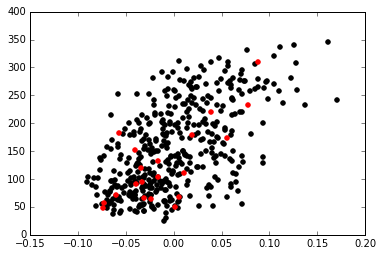

In [20]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = np.matrix(diabetes.target[:-20]).T
diabetes_y_test = np.matrix(diabetes.target[-20:]).T

plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')


In [21]:
diabetes_y_train

matrix([[ 151.],
        [  75.],
        [ 141.],
        [ 206.],
        [ 135.],
        [  97.],
        [ 138.],
        [  63.],
        [ 110.],
        [ 310.],
        [ 101.],
        [  69.],
        [ 179.],
        [ 185.],
        [ 118.],
        [ 171.],
        [ 166.],
        [ 144.],
        [  97.],
        [ 168.],
        [  68.],
        [  49.],
        [  68.],
        [ 245.],
        [ 184.],
        [ 202.],
        [ 137.],
        [  85.],
        [ 131.],
        [ 283.],
        [ 129.],
        [  59.],
        [ 341.],
        [  87.],
        [  65.],
        [ 102.],
        [ 265.],
        [ 276.],
        [ 252.],
        [  90.],
        [ 100.],
        [  55.],
        [  61.],
        [  92.],
        [ 259.],
        [  53.],
        [ 190.],
        [ 142.],
        [  75.],
        [ 142.],
        [ 155.],
        [ 225.],
        [  59.],
        [ 104.],
        [ 182.],
        [ 128.],
        [  52.],
        [  37.],
        [ 170.

## Example 2: Implement three different algorithms to train a linear regression model

### Algorithm1 :Linear regression - Direct Solve(No regularization)

Preliminaries
The builtin function solve(A, b) computes the least squares solution for system of linear equations $$ Ax = b $$ for the vector x such that $$ || \; Ax \; – \; b \;|| $$ is minimized. It is important to note that this function can operate only on small-to-medium sized input matrix that can fit in the driver memory. See the DML language reference for more details.

Linear regression model assumes that relationship between input explanatory (feature) variables X and numerical response variable y is linear. The goal is to estimate regression coefficient w (and residual variable) such that

$$ y = \text{Normal}(Xw, \sigma^2) $$$$ 
\begin{align*}
\text{Cost function, } J(w) &amp;= \dfrac{1}{2} (Xw - y)^2
\end{align*}$$
Differentiating with respect to w,

$$ 
\begin{align*}
dw &amp;= \dfrac{\partial}{\partial w} \dfrac{1}{2} (Xw - y)^2 \\
&amp;= \dfrac{1}{2} 2 X^T (Xw - y) \\
&amp;= (X^TX)w - X^Ty 
\end{align*}$$
Setting the gradient
To find minima, we set the derivative with respect to w to zero, $$\begin{align*}
(X^T X)w - (X^T y) &amp;= 0 \\ 
w &amp;= (X^T X)^{-1}(X^T y) \\
\text{Let } \; A &amp;= X^T X \\
\text{and } \; b &amp;= X^T y \\
\text{Therefore,} \; w &amp;= solve(A, b)
\end{align*}$$




In [22]:
script = """
# add constant feature to X to model intercept
ones = matrix(1, rows=nrow(X), cols=1)
X = cbind(X, ones)
A = t(X)%*% X
b = t(X)%*% y
w = solve(A, b)
bias = as.scalar(w[nrow(w),1])
w = w[1:nrow(w)-1,]
"""

In [23]:
prog =dml(script).input(X=diabetes_X_train, y=diabetes_y_train).output('w', 'bias')
w, bias = ml.execute(prog).get('w', 'bias')
w = w.toNumPy()

SystemML Statistics:
Total execution time:		0.030 sec.
Number of executed Spark inst:	2.




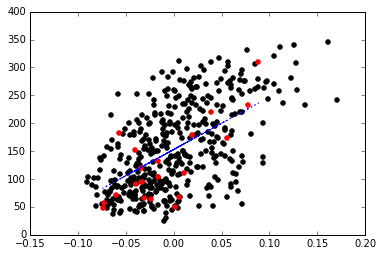

In [24]:
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')

plt.plot(diabetes_X_test, (w*diabetes_X_test)+ bias, color='blue', linestyle='dotted')


   ### Algorithm 2 Stochastic Gradient Descent (No Regularization)
   
   Algorithm
Step 1: Start with an initial point 

while(not converged) { 

  Step 2: Compute gradient dw. 
  
  Step 3: Compute stepsize alpha. 
  
  Step 4: Update: w_new = w_old - alpha*dw
  
  }
  
 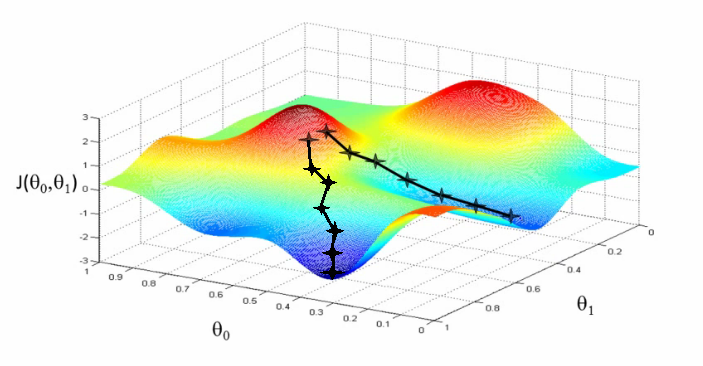
  
  
  #### Gradient formula
  
$$ dw = r = (X^T X)w - (X^T y) $$
Step size formula
We perform a line search to choose the step size alpha to minimize the cost function J(w). From basic calculus, alpha minimizes the function J(w) when the directional derivative with respect to alpha is zero.

$$ alpha = \dfrac{r^T r}{ r^T X^T X r } $$
  

In [26]:
script = """
    # add constant feature to X to model intercepts
    ones = matrix(1, rows=nrow(X), cols=1)
    X = cbind(X, ones)
    max_iter = 100
    w = matrix(0, rows=ncol(X), cols=1)
    for(i in 1:max_iter){
        XtX = t(X) %*% X
        dw = XtX %*%w - t(X) %*% y
        alpha = (t(dw) %*% dw) / (t(dw) %*% XtX %*% dw)
        w = w - dw*alpha
    }
    bias = as.scalar(w[nrow(w),1])
    w = w[1:nrow(w)-1,]
"""

    

In [27]:
prog = dml(script).input(X=diabetes_X_train, y=diabetes_y_train).output('w').output('bias')
w, bias = ml.execute(prog).get('w', 'bias')
w = w.toNumPy()

SystemML Statistics:
Total execution time:		0.105 sec.
Number of executed Spark inst:	2.




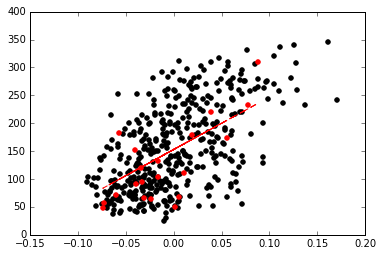

In [28]:
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')

plt.plot(diabetes_X_test, (w*diabetes_X_test)+bias, color='red', linestyle ='dashed')

### Algorithm 3: Linear Regression - Conjugate Gradient (no regularization)

Problem with gradient descent: Takes very similar directions many times

Solution: Enforce conjugacy

Step 1: Start with an initial point 

while(not converged) {

   Step 2: Compute gradient dw.
   
   Step 3: Compute stepsize alpha.
   
   Step 4: Compute next direction p by enforcing conjugacy with previous direction.
   
   Step 4: Update: w_new = w_old + alpha*p
   
}


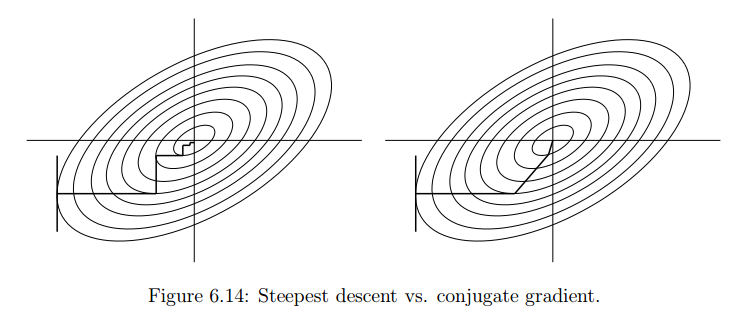



In [29]:
script = """
    # add constant feature to X to model intercepts
    X = cbind(X, matrix(1, rows=nrow(X), cols=1))
    m = ncol(X); i = 1; 
    max_iter = 20;
    w = matrix (0, rows = m, cols = 1); # initialize weights to 0
    dw = - t(X) %*% y; p = - dw;        # dw = (X'X)w - (X'y)
    norm_r2 = sum (dw ^ 2); 
    for(i in 1:max_iter) {
        q = t(X) %*% (X %*% p)
        alpha = norm_r2 / sum (p * q);  # Minimizes f(w - alpha*r)
        w = w + alpha * p;              # update weights
        dw = dw + alpha * q;           
        old_norm_r2 = norm_r2; norm_r2 = sum (dw ^ 2);
        p = -dw + (norm_r2 / old_norm_r2) * p; # next direction - conjugacy to previous direction
        i = i + 1;
    }
    bias = as.scalar(w[nrow(w),1])
    w = w[1:nrow(w)-1,]    
"""

In [30]:
prog = dml(script).input(X=diabetes_X_train, y=diabetes_y_train).output('w').output('bias')
w, bias = ml.execute(prog).get('w','bias')
w = w.toNumPy()

SystemML Statistics:
Total execution time:		0.014 sec.
Number of executed Spark inst:	2.




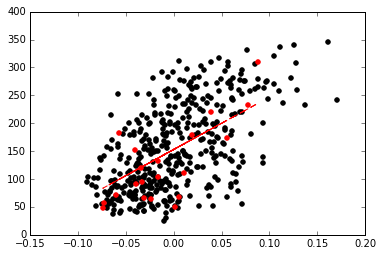

In [31]:
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')

plt.plot(diabetes_X_test, (w*diabetes_X_test)+bias, color='red', linestyle ='dashed')

## Example 3: Invoke existing SystemML algorithm script LinearRegDS.dml using MLContext API

In [32]:
from systemml import dmlFromResource
prog = dmlFromResource('scripts/algorithms/LinearRegDS.dml').input(X=diabetes_X_train, y=diabetes_y_train).input('$icpt',1.0).output('beta_out')
w = ml.execute(prog).get('beta_out')
w = w.toNumPy()
bias=w[1]

Computing the statistics...
Calling the Direct Solver...
BEGIN LINEAR REGRESSION SCRIPT
Reading X and Y...
END LINEAR REGRESSION SCRIPT
Writing the output matrix...
AVG_TOT_Y,153.36255924170615
STDEV_TOT_Y,77.21853383600028
AVG_RES_Y,3.633533705616816E-14
STDEV_RES_Y,63.038506337610244
DISPERSION,3973.853281276927
R2,0.3351312506863875
ADJUSTED_R2,0.33354822985468835
R2_NOBIAS,0.3351312506863875
ADJUSTED_R2_NOBIAS,0.33354822985468835
SystemML Statistics:
Total execution time:		0.009 sec.
Number of executed Spark inst:	2.




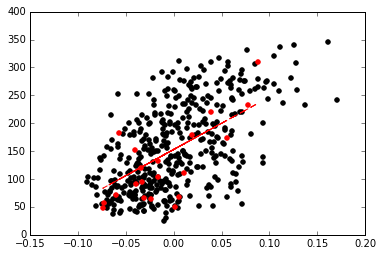

In [33]:
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')

plt.plot(diabetes_X_test, (w[0]*diabetes_X_test)+bias, color='red', linestyle ='dashed')

## Example 4: Invoke existing SystemML algorithm using scikit-learn/SparkML pipeline like API

mllearn API allows a Python programmer to invoke SystemML's algorithms using scikit-learn like API as well as Spark's MLPipeline API.

In [34]:
from pyspark.sql import SQLContext
from systemml.mllearn import LinearRegression
sqlCtx = SQLContext(sc)

In [35]:
regr = LinearRegression(sqlCtx)
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

Running the CG algorithm...
BEGIN LINEAR REGRESSION SCRIPT
Reading X and Y...
||r|| initial value = 64725.64237405237,  target value = 0.06472564237405237
Iteration 1:  ||r|| / ||r init|| = 0.013822097283108788
Iteration 2:  ||r|| / ||r init|| = 4.205033429162128E-15
Computing the statistics...
The CG algorithm is done.
END LINEAR REGRESSION SCRIPT
Writing the output matrix...
AVG_TOT_Y,153.36255924170615
STDEV_TOT_Y,77.21853383600028
AVG_RES_Y,-6.384782118488863E-13
STDEV_RES_Y,63.03850633759284
DISPERSION,3973.853281274733
R2,0.33513125068675453
ADJUSTED_R2,0.3335482298550564
R2_NOBIAS,0.33513125068675453
ADJUSTED_R2_NOBIAS,0.3335482298550564
SystemML Statistics:
Total execution time:		0.004 sec.
Number of executed Spark inst:	2.




lr

In [36]:
predictions = regr.predict(diabetes_X_test)

SystemML Statistics:
Total execution time:		0.001 sec.
Number of executed Spark inst:	1.




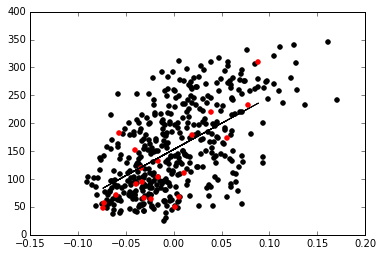

In [37]:
# Use the trained model to perform prediction
%matplotlib inline
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')

plt.plot(diabetes_X_test, predictions, color='black')

### (Optional) Install OpenBLAS

!wget https://github.com/xianyi/OpenBLAS/archive/v0.2.20.tar.gz !tar -xzf v0.2.20.tar.gz !cd OpenBLAS-0.2.20/ && make clean !cd OpenBLAS-0.2.20/ && make USE_OPENMP=1


## Example 5: Invoking a Keras model with SystemML

See SystemML's deep learning documentation for more detail.

In [43]:
!wget https://github.com/xianyi/OpenBLAS/archive/v0.2.20.tar.gz !wget https://github.com/xianyi/OpenBLAS/archive/v0.2.20.tar.gz 
!tar -xzf v0.2.20.tar.gz 
!cd OpenBLAS-0.2.20/ && make clean 
!cd OpenBLAS-0.2.20/ && make USE_OPENMP=1

--2018-04-03 14:03:09--  https://github.com/xianyi/OpenBLAS/archive/v0.2.20.tar.gz
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/xianyi/OpenBLAS/tar.gz/v0.2.20 [following]
--2018-04-03 14:03:09--  https://codeload.github.com/xianyi/OpenBLAS/tar.gz/v0.2.20
Resolving codeload.github.com (codeload.github.com)... 192.30.253.121, 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11637301 (11M) [application/x-gzip]
Saving to: ‘v0.2.20.tar.gz’

100%[======================================>] 11,637,301  7.81MB/s   in 1.4s   

2018-04-03 14:03:12 (7.81 MB/s) - ‘v0.2.20.tar.gz’ saved [11637301/11637301]

--2018-04-03 14:03:12--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: 

In [ ]:
from mlxtend.data import mnist_data
import numpy as np
from sklearn.utils import shuffle
# Download the MNIST dataset
X, y = mnist_data()
X, y = shuffle(X, y)
# Split the data into training and test
n_samples = len(X)
X_train = X[:int(.9 * n_samples)]
y_train = y[:int(.9 * n_samples)]
X_test = X[int(.9 * n_samples):]
y_test = y[int(.9 * n_samples):]
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout,Flatten
from keras import backend as K
from keras.models import Model
input_shape = (1,28,28) if K.image_data_format() == 'channels_first' else (28,28, 1)
keras_model = Sequential()
keras_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
keras_model.add(MaxPooling2D(pool_size=(2, 2)))
keras_model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
keras_model.add(MaxPooling2D(pool_size=(2, 2)))
keras_model.add(Flatten())
keras_model.add(Dense(512, activation='relu'))
keras_model.add(Dropout(0.5))
keras_model.add(Dense(10, activation='softmax'))

# Scale the input features
scale = 0.00390625
X_train = X_train*scale
X_test = X_test*scale

from systemml.mllearn import Keras2DML
sysml_model = Keras2DML(spark, keras_model, input_shape=(1,28,28), weights='weights_dir')
sysml_model.setConfigProperty('sysml.native.blas', 'openblas')
sysml_model.setConfigProperty('sysml.native.blas.directory', os.path.join(os.getcwd(),'OpenBLAS-0.2.20/'))
# sysml_model.setGPU(True).setForceGPU(True)
sysml_model.summary()
sysml_model.fit(X_train, y_train)